In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving healthcare_dataset.csv to healthcare_dataset.csv


In [4]:
df=pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,17-11-2022,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146,Elective,01-12-2022,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,01-06-2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404,Emergency,15-06-2023,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,09-01-2019,Paul Baker,Walton LLC,Medicare,36874.89700,292,Emergency,08-02-2019,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,02-05-2020,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480,Urgent,03-05-2020,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,09-07-2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34418,477,Urgent,02-08-2021,Paracetamol,Normal


In [5]:
df.shape

(10000, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [7]:
df.dtypes

,0
Name,object
Age,int64
Gender,object
Blood Type,object
Medical Condition,object
Date of Admission,object
Doctor,object
Hospital,object
Insurance Provider,object
Billing Amount,float64


In [8]:
df.nunique()

,0
Name,9378
Age,68
Gender,2
Blood Type,8
Medical Condition,6
Date of Admission,1815
Doctor,9416
Hospital,8639
Insurance Provider,5
Billing Amount,10000


In [9]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112565,299.000000
75%,68.000000,37733.913725,400.000000
max,85.000000,49995.902280,500.000000


In [10]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


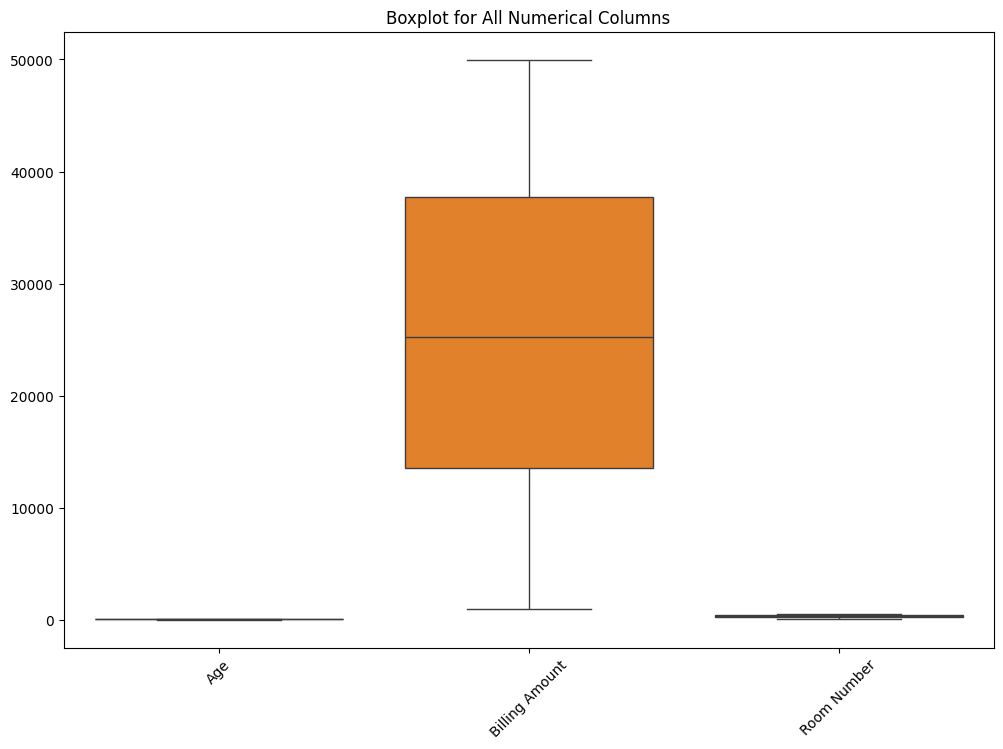

In [11]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot for All Numerical Columns')
plt.xticks(rotation=45)
plt.show()


After visualizing the data using boxplots for the numerical columns (Age, Billing Amount, and Room Number), we found that there are no significant outliers. All values fall within a reasonable range, indicating that the dataset is clean and consistent in terms of numerical data. Therefore, no outlier treatment is required.

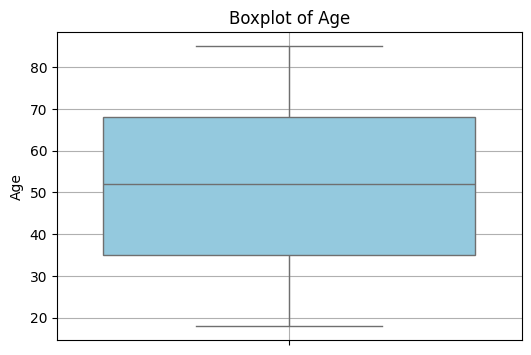

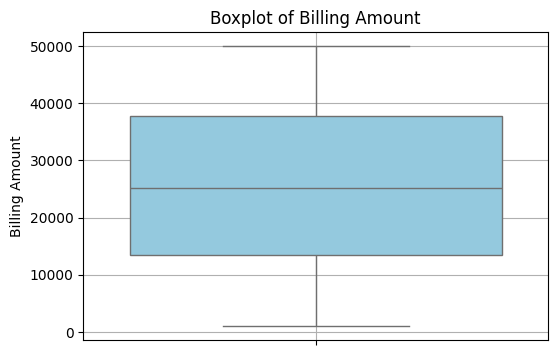

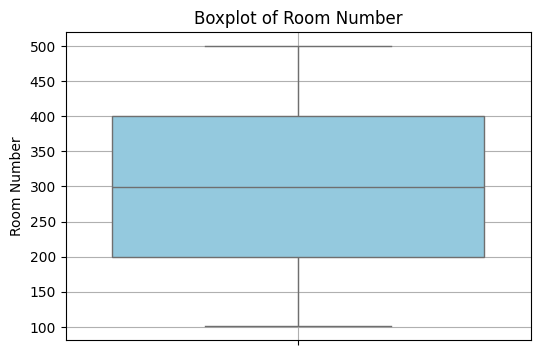

In [14]:
numeric_cols = ['Age', 'Billing Amount', 'Room Number']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


###  Gender Distribution Analysis:
# From the bar chart, we observe that the number of female patients is slightly higher than male patients.
# However, the distribution is fairly balanced, which indicates that gender is not significantly biased in the dataset.
bold text ***bold text***

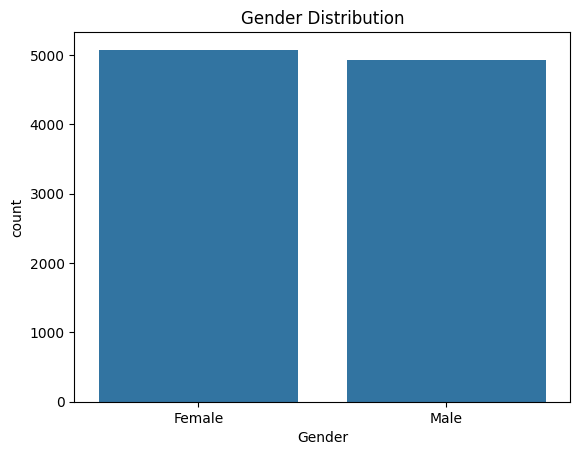

In [15]:
sns.countplot(x=df['Gender'])
plt.title('Gender Distribution')
plt.show()

the distribution of blood types among patients appears to be relatively uniform, with each blood type (e.g., O-, A+, B+, AB-, etc.) having nearly equal representation. This indicates that the dataset is balanced in terms of blood type, which minimizes the risk of bias in analyses related to medical conditions, treatments, or outcomes based on blood type.

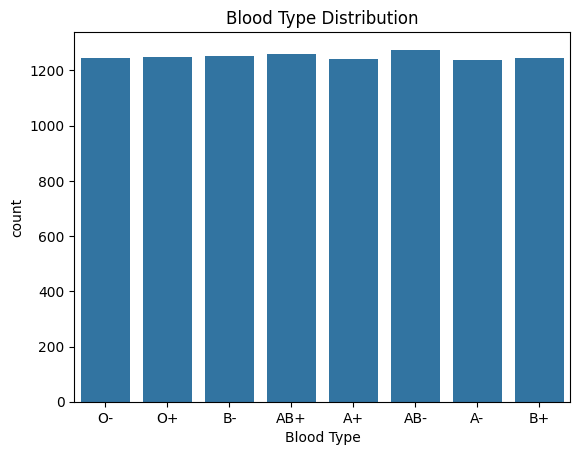

In [16]:
sns.countplot(x='Blood Type', data=df)
plt.title('Blood Type Distribution')
plt.show()

This chart shows the distribution of blood types for both males and females. We can see that the numbers are very close for each blood type. For example, more males have O- blood type, while more females have AB-. Overall, the blood type distribution is balanced between genders, with only small differences.

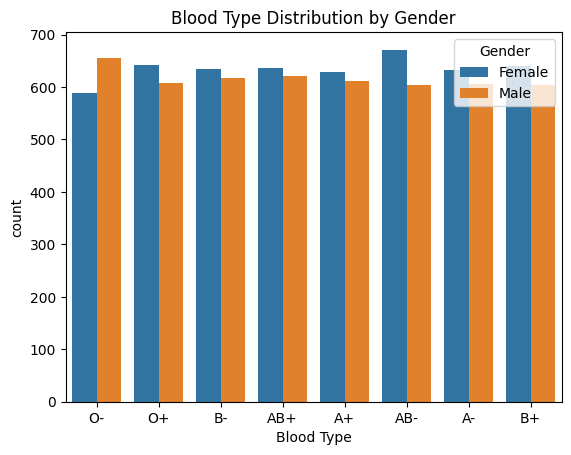

In [17]:
sns.countplot(x='Blood Type', hue='Gender', data=df)
plt.title('Blood Type Distribution by Gender')
plt.show()


This bar chart shows the number of patients with each medical condition. We can see that all medical conditions are nearly equally distributed. However, Asthma and Cancer have a slightly higher number of patients compared to the others.

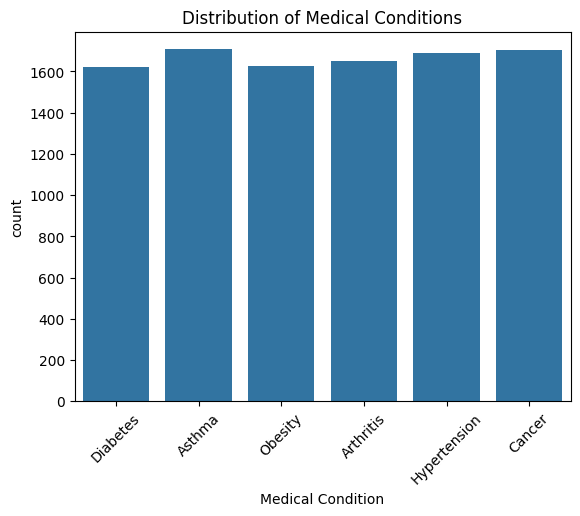

In [18]:
sns.countplot(x='Medical Condition', data=df)
plt.title('Distribution of Medical Conditions')
plt.xticks(rotation=45)
plt.show()

# Are certain medical conditions more prevalent based on gender, blood type, or age?

I used a countplot to show the number of patients by gender for each medical condition. The goal was to compare males and females in each disease. We noticed that females were more in some cases like asthma and obesity, while males were more in hypertension.

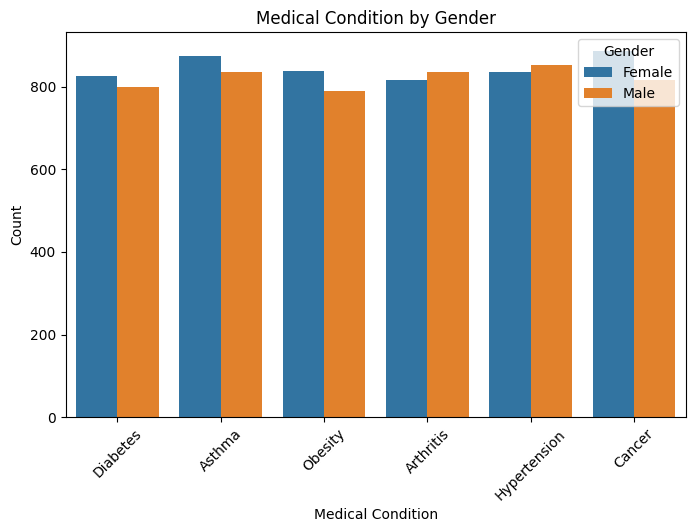

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Medical Condition', hue='Gender', data=df)
plt.title('Medical Condition by Gender')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


I use a countplot to show the number of medical conditions across different blood types. This helps identify if certain diseases are more common in specific blood types.

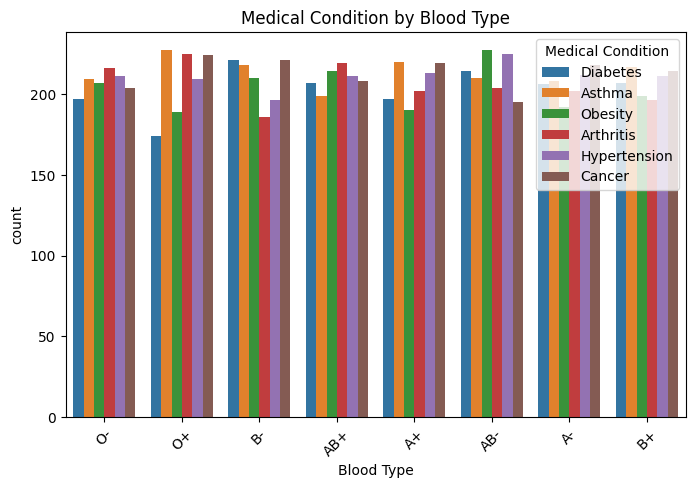

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Blood Type', hue='Medical Condition')
plt.title('Medical Condition by Blood Type')
plt.xticks(rotation=45)
plt.show()

In [30]:
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


I categorized the 'Age' column into age groups such as '0-18', '19-35', etc., using the pd.cut function. Then, we used a countplot to show the distribution of medical conditions across each age group. This helps us identify which age groups are more affected by specific medical conditions.

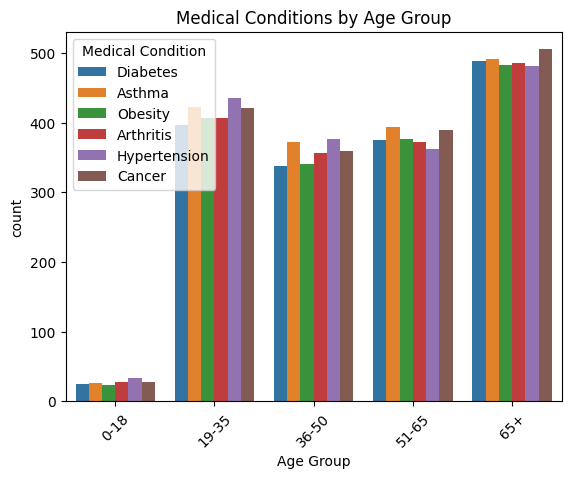

In [31]:
sns.countplot(data=df, x='Age Group', hue='Medical Condition')
plt.title('Medical Conditions by Age Group')
plt.xticks(rotation=45)
plt.show()


Distribution of Medical Conditions by Admission Type


Emergency and urgent admissions are more common for serious conditions like Cancer and Hypertension, while elective admissions are more frequent for Asthma and Arthritis

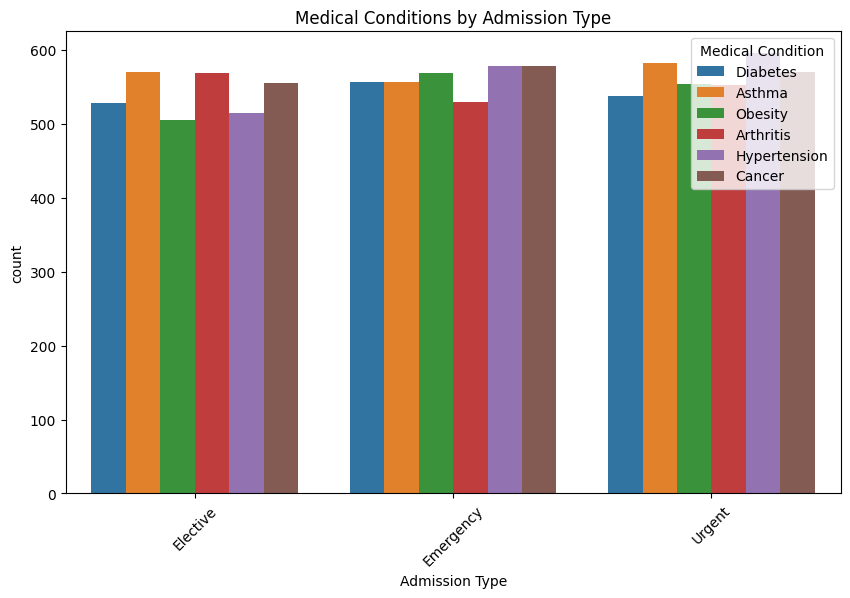

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Admission Type', hue='Medical Condition')
plt.title('Medical Conditions by Admission Type')
plt.xticks(rotation=45)
plt.show()

I converted the "Date of Admission" column into months to facilitate seasonal pattern analysis and identify months with higher patient admissions or specific diseases.

In [35]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Admission Month'] = df['Date of Admission'].dt.month_name()

<ipython-input-35-ed9bb807eb37>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])


I analyzed the distribution of different medical conditions by hospital admission month to identify any seasonal trends in disease occurrence.

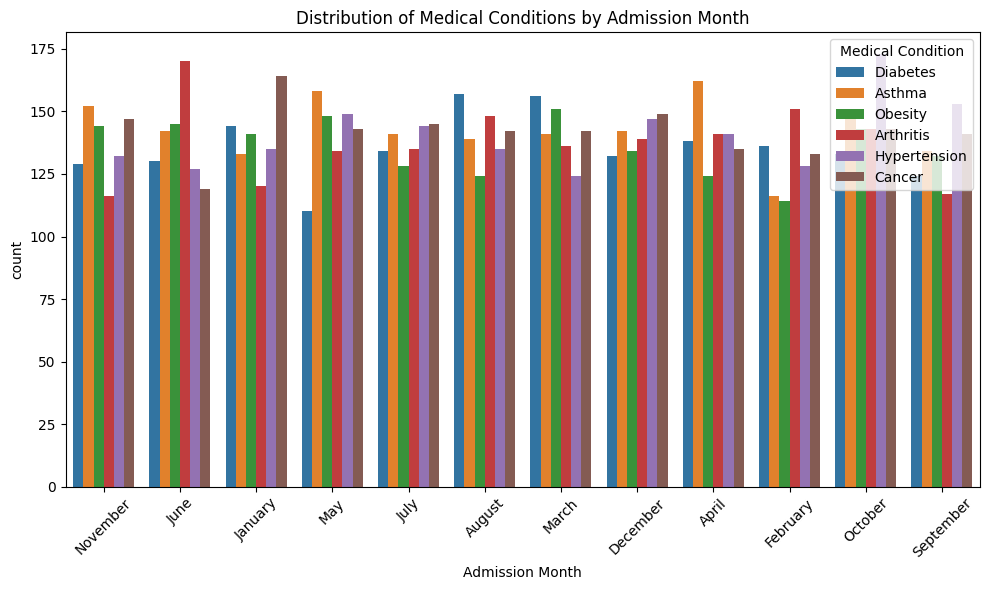

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Admission Month', hue='Medical Condition')
plt.title('Distribution of Medical Conditions by Admission Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

the average length of stay in hospital for each medical condition

---



In [43]:
# Convert columns to dates
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], dayfirst=True)
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], dayfirst=True)

# # Calculate the length of stay
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

I calculate the average length of stay for each medical condition using groupby() and mean(). We found that patients with Arthritis had the longest stay, followed by Diabetes and Asthma

In [46]:
avg_stay_per_condition = df.groupby('Medical Condition')['Length of Stay'].mean().sort_values(ascending=False)
avg_stay_per_condition

,Length of Stay
Medical Condition,
Arthritis,15.990303
Diabetes,15.574245
Asthma,15.481265
Cancer,15.479742
Hypertension,15.430095
Obesity,15.421990


Which doctors handle the most critical or long-stay cases

In [47]:
avg_stay_by_doctor = df.groupby('Doctor')['Length of Stay'].mean().sort_values(ascending=False)
avg_stay_by_doctor

,Length of Stay
Doctor,
John Adkins,30.0
Robert Peters,30.0
Margaret Watkins,30.0
Christina Henderson,30.0
Amy Martinez,30.0
...,...
Vickie Ramsey,1.0
Robert Roman,1.0
Breanna Rivera,1.0


I calculated the average billing amount per insurance provider to identify which companies are associated with higher treatment costs. This helps the hospital assess the financial impact of different insurance providers.

In [48]:
avg_billing_by_insurance = df.groupby('Insurance Provider')['Billing Amount'].mean().sort_values(ascending=False)
avg_billing_by_insurance

,Billing Amount
Insurance Provider,
Aetna,25837.923338
Cigna,25656.946859
Blue Cross,25652.489617
UnitedHealthcare,25404.685388
Medicare,25002.480429
